In [8]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('credit_card.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
df.dropna(inplace = True)
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

In [12]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.785000      0.000000             0.500000   
75%                484.147500   1132.385490             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8636.000000                       8636.000000   
mean                     0.205909                          0.368820   
std                      0.300054                          0.398093   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8636.000000       8636.000000    8636.000000   8636.000000   
mean                 0.137604          3.313918      15.033233   4522.091030   
std                  0.201791          6.912506      25.180468   3659.240379   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8636.000000       8636.000000       8636.000000  8636.000000  
mean    1784.478099        864.304943          0.159304    11.534391  
std     2909.810090       2372.566350          0.296271     1.310984  
min        0.049513          0.019163          0.000000     6.000000  
25%      418.559237        169.163545          0.000000    12.000000  
50%      896.675701        312.452292          0.000000    12.000000  
75%     1951.142090        825.496463          0.166667    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [13]:
df.drop(columns = 'CUST_ID', inplace = True)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

In [14]:
# dataframe that will be used in algorithm
X = df[['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PURCHASES_TRX',]]
X.head()

BALANCE  PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  \
0    40.900749      95.40                   95.40      0.000000        1000.0   
1  3202.467416       0.00                    0.00   6442.945483        7000.0   
2  2495.148862     773.17                    0.00      0.000000        7500.0   
4   817.714335      16.00                    0.00      0.000000        1200.0   
5  1809.828751    1333.28                 1333.28      0.000000        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PURCHASES_TRX  
0   201.802084        139.509787              2  
1  4103.032597       1072.340217              0  
2   622.066742        627.284787             12  
4   678.334763        244.791237              1  
5  1400.057770       2407.246035              8

In [15]:
kmeans = KMeans(n_clusters = 6)

In [16]:
# build the model
#detrmine centroid position, assign datato groups based on centroids
kmeans.fit(X)

KMeans(n_clusters=6)

In [17]:
len(df)

8636

In [18]:
# centroid columns are in order of dataframe columns 
kmeans.cluster_centers_

array([[4.04947632e+03, 2.67786769e+03, 8.78517462e+02, 7.00555615e+03,
        9.00210055e+03, 1.14767757e+04, 1.69663863e+03, 3.38598485e+01],
       [7.99991376e+02, 5.09093900e+02, 2.60895142e+02, 4.67565507e+02,
        2.15328848e+03, 8.98318627e+02, 5.33206209e+02, 9.53391984e+00],
       [1.76065752e+03, 1.36361841e+03, 5.26467157e+02, 9.89974996e+02,
        6.59305679e+03, 2.01305177e+03, 7.19215862e+02, 2.00212418e+01],
       [5.43598234e+03, 1.87212035e+03, 6.89318517e+02, 2.49985688e+03,
        1.19579592e+04, 2.65376808e+03, 1.83904509e+03, 2.45374150e+01],
       [4.34638973e+03, 1.11178975e+03, 9.51794500e+02, 1.02909453e+03,
        4.59125000e+03, 1.56251945e+03, 2.66896761e+04, 2.19000000e+01],
       [5.52259783e+03, 2.31193132e+04, 6.89661765e+03, 1.25347183e+03,
        1.61647059e+04, 2.48533310e+04, 3.20439747e+03, 1.23500000e+02]])

In [19]:
# create column in original dataframe with cluster group number
df['cluster'] = kmeans.labels_
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        2  
2   622.066742        627.284787          0.000000      12        2  
4   678.334763        244.791237          0.000000      12        1  
5  1400.057770       2407.246035          0.000000      12        1

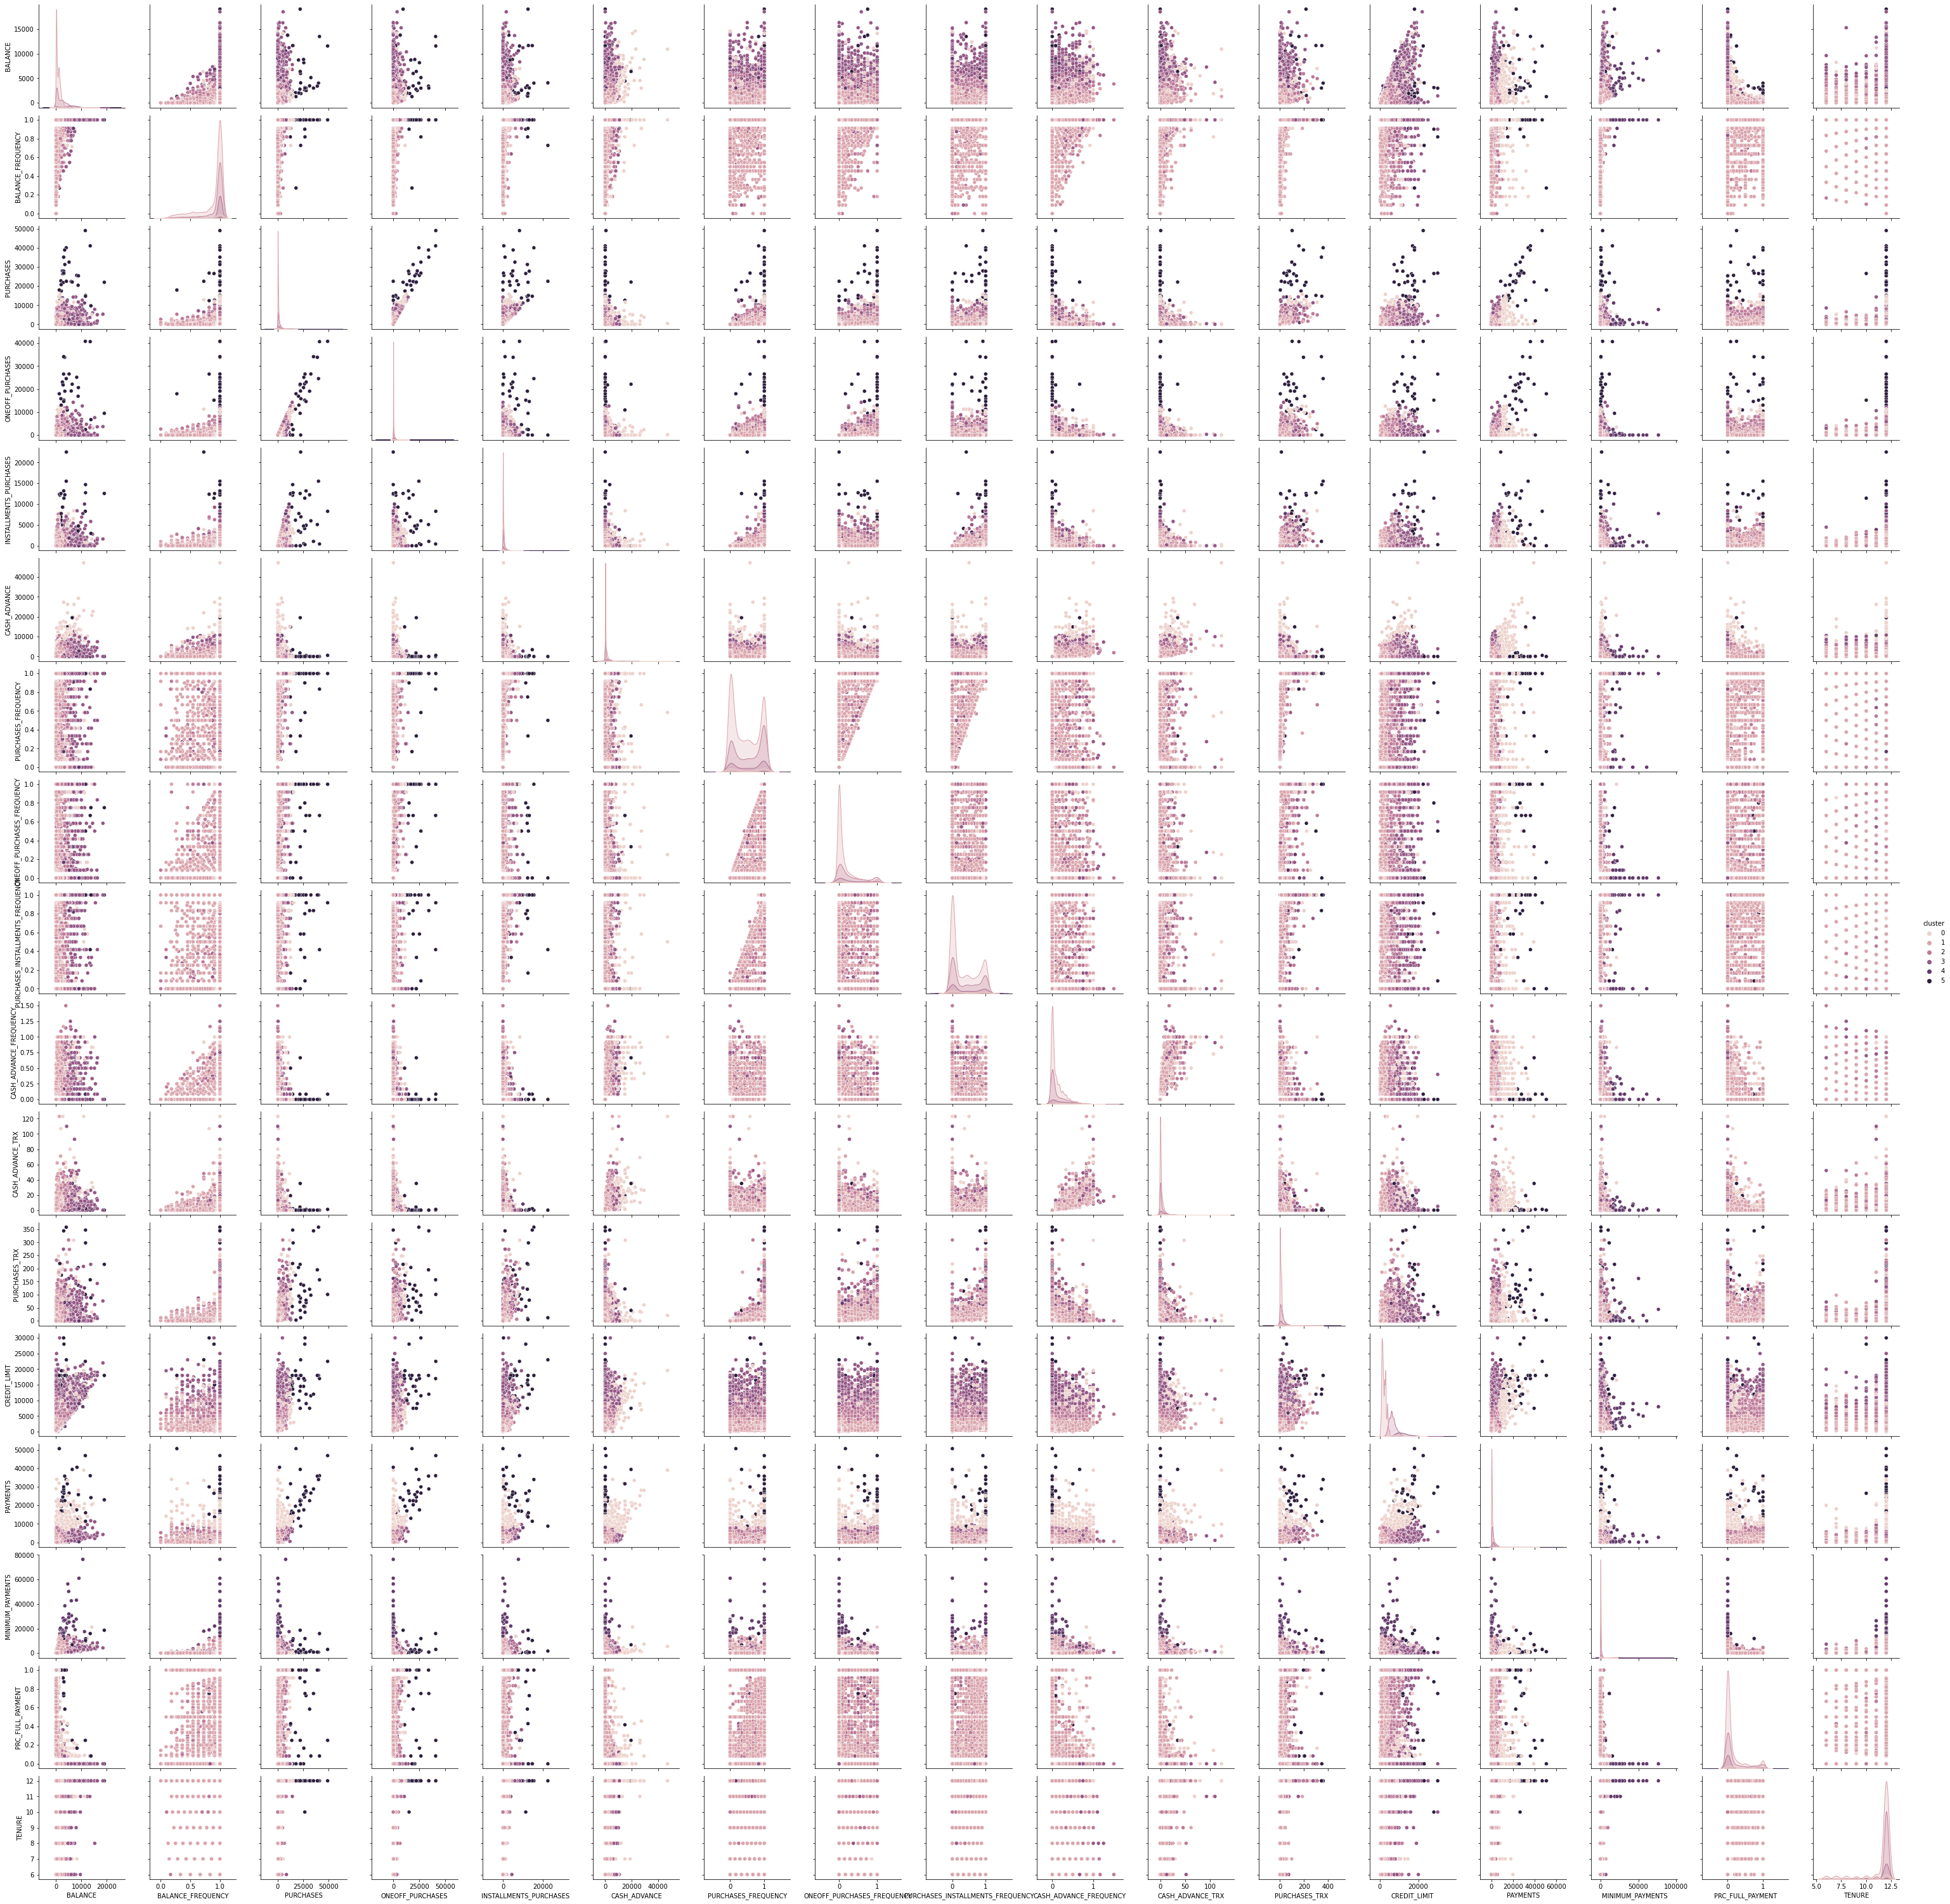

In [20]:
# compare all numerical features by cluster group
sns.pairplot(data=df, hue='cluster')

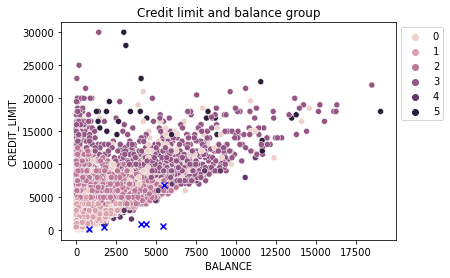

In [21]:
# compare "balance" and "credit limit"
sns.scatterplot(data=df, x='BALANCE', y='CREDIT_LIMIT', hue='cluster')

# scatterplot of centroid coordinates for balance and  credit limit
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], c='blue', marker='x')

plt.title('Credit limit and balance group')
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

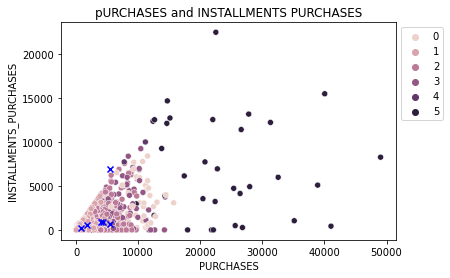

In [22]:
# compare "purchases " and "installment purchases "
sns.scatterplot(data=df, x='PURCHASES', y='INSTALLMENTS_PURCHASES', hue='cluster')

# scatterplot of centroid coordinates for purchases and  installments purchases
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], c='blue', marker='x')

plt.title('pURCHASES and INSTALLMENTS PURCHASES')
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

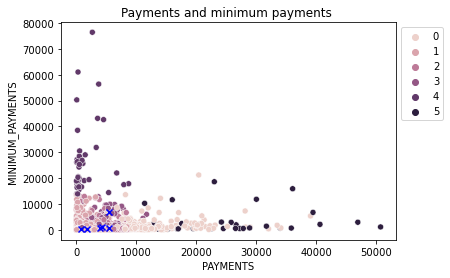

In [23]:
# compare "payments " and "minimum payments"
sns.scatterplot(data=df, x='PAYMENTS', y='MINIMUM_PAYMENTS', hue='cluster')

# scatterplot of centroid coordinates for payments and  minimum payments
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], c='blue', marker='x')

plt.title('Payments and minimum payments ')
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

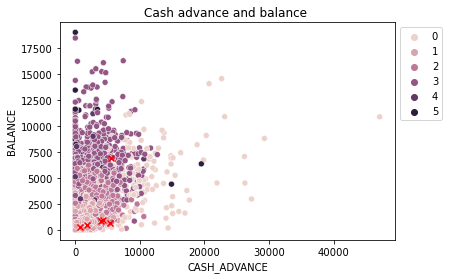

In [32]:
# compare "cash advance " and " purchases prx"
sns.scatterplot(data=df, x='CASH_ADVANCE', y='BALANCE', hue='cluster')

# scatterplot of centroid coordinates for cash advance and balance
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title('Cash advance and balance ')
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [37]:
# select a cluster from dataframe
cluster = df.loc[df['cluster'] == 0]
cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
23   3800.151377           0.818182    4248.35           3454.56   
39   1411.602230           0.454545     963.24            963.24   
50   4931.331857           1.000000     901.42            646.07   
71   2990.422186           0.909091    4523.27           1664.09   
109  6644.201651           1.000000    4478.75           2721.59   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
23                   793.79   7974.415626             1.000000   
39                     0.00   6173.682877             0.083333   
50                   255.35   8530.648614             0.625000   
71                  2859.18  27296.485760             0.666667   
109                 1757.16   7205.520805             1.000000   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
23                     0.083333                          0.916667   
39                     0.083333                          0.000000   
50                     0.375000                          0.250000   
71                     0.500000                          0.583333   
109                    0.916667                          1.000000   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
23                 0.333333                13             13        9000.0   
39                 0.333333                 6              6        7500.0   
50                 0.875000                37              9       12000.0   
71                 0.833333                27             33        7000.0   
109                0.583333                21             64        9000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
23    9479.043842       1425.426525          0.000000      12        0  
39   20071.075440        719.948985          0.333333      12        0  
50    8113.297346       1012.415961          0.000000       8        0  
71   28232.694460       1107.030803          0.454545      12        0  
109  10857.943210       2469.571326          0.083333      12        0

In [25]:
# number of customers in this cluster
len(cluster)

264

In [26]:
# descriptive statistics for this cluster
cluster.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    264.000000         264.000000    264.000000        264.000000   
mean    4049.476319           0.913124   2677.867689       1799.433561   
std     2704.033324           0.193853   3821.744407       2959.481802   
min        4.382924           0.090909      0.000000          0.000000   
25%     1895.801533           0.909091      0.000000          0.000000   
50%     3915.511620           1.000000    571.920000        247.750000   
75%     5486.382762           1.000000   4064.045000       2344.917500   
max    14581.459140           1.000000  15704.040000      12618.860000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              264.000000    264.000000           264.000000   
mean               878.517462   7005.556155             0.476725   
std               1563.528063   6135.526861             0.437154   
min                  0.000000      0.000000             0.000000   
25%                  0.000000   2787.038069             0.000000   
50%                 78.035000   6010.150945             0.333333   
75%               1069.675000   9823.164247             1.000000   
max               8409.930000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  264.000000                        264.000000   
mean                     0.305317                          0.366681   
std                      0.368241                          0.419550   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.087121                          0.087121   
75%                      0.583333                          0.833333   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              264.000000        264.000000     264.000000    264.000000   
mean                 0.395675         14.401515      33.859848   9002.100551   
std                  0.285705         17.502139      53.766988   3624.219282   
min                  0.000000          0.000000       0.000000   1200.000000   
25%                  0.166667          2.000000       0.000000   6500.000000   
50%                  0.416667         10.000000       7.000000   9000.000000   
75%                  0.583333         20.000000      49.250000  11000.000000   
max                  1.000000        123.000000     308.000000  21000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  cluster  
count    264.000000        264.000000        264.000000  264.000000    264.0  
mean   11476.775718       1696.638626          0.192865   11.742424      0.0  
std     5321.846421       2121.268616          0.272843    0.936145      0.0  
min     4453.691497          5.045387          0.000000    6.000000      0.0  
25%     8164.728616        669.962047          0.000000   12.000000      0.0  
50%    10058.096025       1183.180875          0.083333   12.000000      0.0  
75%    12582.028055       1831.305709          0.250000   12.000000      0.0  
max    39048.597620      21235.065300          1.000000   12.000000      0.0

In [27]:

# analyze balance range of cluster


# sort the cluster numbers from min(0) to max(6)
sorted_clusters = sorted(df['cluster'].unique())

# select the rows of the same cluster number
# then get min/max balance and average PURCHASES
print("Cluster balance Ranges\n")
for cluster_num in sorted_clusters:
    small_df = df.loc[df['cluster'] == cluster_num]
    min_BALANCE = small_df['BALANCE'].min()
    max_BALANCE = small_df['BALANCE'].max()
    avg_PURCHASES = small_df['PURCHASES'].mean()
    
    print(f"Cluster {cluster_num}: ${min_BALANCE}-{max_BALANCE}K, avg PURCHASES: {int(avg_PURCHASES)}")

Cluster balance Ranges

Cluster 0: $4.382924-14581.45914K, avg PURCHASES: 2677
Cluster 1: $0.0-3992.261885K, avg PURCHASES: 509
Cluster 2: $0.0-6512.478876K, avg PURCHASES: 1363
Cluster 3: $0.48805-18495.55855K, avg PURCHASES: 1872
Cluster 4: $1418.254924-11209.37076K, avg PURCHASES: 1111
Cluster 5: $1268.809031-19043.13856K, avg PURCHASES: 23119


In [40]:
#analyze credit limit range of cluster


# sort the cluster numbers from min(0) to max(6)
sorted_clusters = sorted(df['cluster'].unique())

# select the rows of the same cluster number
# then get min/max credit limit and average balance
print("Cluster credit limit Ranges\n")
for cluster_num in sorted_clusters:
    small_df = df.loc[df['cluster'] == cluster_num]
    min_CREDIT_LIMIT = small_df['CREDIT_LIMIT'].min()
    max_CREDIT_LIMIT = small_df['CREDIT_LIMIT'].max()
    avg_BALANCE = small_df['BALANCE'].mean()
    
    print(f"Cluster {cluster_num}: ${min_CREDIT_LIMIT}-{max_CREDIT_LIMIT}K, avg BALANCE: {int(avg_BALANCE)}")

Cluster credit limit Ranges

Cluster 0: $1200.0-21000.0K, avg BALANCE: 4049
Cluster 1: $50.0-5200.0K, avg BALANCE: 799
Cluster 2: $2000.0-12500.0K, avg BALANCE: 1761
Cluster 3: $7000.0-30000.0K, avg BALANCE: 5435
Cluster 4: $1000.0-11000.0K, avg BALANCE: 4346
Cluster 5: $7500.0-30000.0K, avg BALANCE: 5522


In [ ]:
# the group in cluster 1 has the smallest credit limit comparing with the other clusters.